In [78]:
import numpy as np
import matplotlib.pyplot as plt
import time, copy, warnings

import torch
import torchvision

from torchvision import datasets, transforms

from sklearn import linear_model, svm
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
np.random.seed(42)

## Load the MNIST data

In [79]:
# Load the dataset and transform it into tensors and normalize between -1 and 1.

# Choose size as a power of 2
size = 8 

transform = transforms.Compose([  
    transforms.Resize((size, size)),
    transforms.ToTensor(),
    transforms.Normalize(mean=(0.5,), std=(0.5,)) 
])



# Load MNIST train and test dataset
trainset = torchvision.datasets.MNIST(root='~/Documents/image_datasets/MNIST', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='~/Documents/image_datasets/MNIST', train=False, download=True, transform=transform)


num_train, num_test = len(trainset), len(testset)
print(f'number of (train, test) examples = {num_train, num_test}')




number of (train, test) examples = (60000, 10000)


In [81]:
from collections import defaultdict
def generate_subset(dataset,size):
    class_indices = defaultdict(list)
    for idx, (image,label) in enumerate(dataset):
        class_indices[label].append(idx)
    
    selected_indices = []
    for indices in class_indices.values():
        selected_indices.extend(np.random.choice(indices,size,replace=False))
    
    subset = torch.utils.data.Subset(dataset,selected_indices)

    X=torch.stack([image.flatten() for image, _ in subset]).numpy()
    y=np.array([label for _,label in subset])

    return X,y




X_train, y_train = generate_subset(trainset,1000)
X_test, y_test = generate_subset(testset,100)

# random_indices_test = np.random.choice(range(len(X_test)), 100,replace=False)
# X_test , y_test = X_test[random_indices_test], y_test[random_indices_test]

# random_indices_train = np.random.choice(range(len(X_train)), 1000,replace=False)
# X_train , y_train = X_train[random_indices_train], y_train[random_indices_train]







num_train, num_test = X_train.shape[0], X_test.shape[0]
print(f'number of (train, test) examples = {num_train, num_test}')




number of (train, test) examples = (10000, 1000)


image_9576 of size (8, 8) = (64,) :


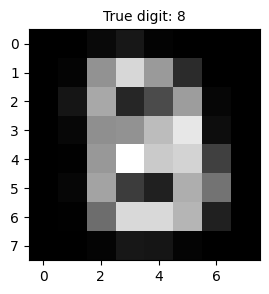

In [82]:

idx = np.random.randint(num_train)
image, label = X_train[idx], y_train[idx]
print(f'image_{idx} of size {(size, size)} = {image.shape} :')

plt.figure(figsize=(3,3))
plt.imshow(image.reshape(size, size), cmap='gray')
plt.title(f'True digit: {label}', fontsize=10)
plt.show()

In [83]:
from qiskit.circuit.library import PauliFeatureMap, ZFeatureMap, ZZFeatureMap
from qiskit_machine_learning.circuit.library import RawFeatureVector
import numpy as np

def create_feature_map(size, encoding):
    """
    Creates a feature map circuit based on the specified encoding type.

    Parameters:
        size (int): The size of the features.
        encoding (str): The encoding type. Choose from 'Pauli', 'Z', 'ZZ', or 'RawFeatureVector'.

    Returns:
        qiskit.QuantumCircuit: The feature map quantum circuit.
    """

    num_features = size ** 2
    num_qubits = num_features

    if encoding == 'Pauli':
        fm = PauliFeatureMap(feature_dimension=num_features, reps=1, paulis=['Z'])
    elif encoding == 'Z':
        fm = ZFeatureMap(feature_dimension=num_features, reps=1)
    elif encoding == 'ZZ':
        fm = ZZFeatureMap(feature_dimension=num_features, reps=1)
    elif encoding == 'RawFeatureVector':
        num_qubits = int(np.log2(num_features))
        fm = RawFeatureVector(feature_dimension=num_features)
    else:
        raise ValueError("Invalid encoding type. Choose from 'Pauli', 'Z', 'ZZ', or 'RawFeatureVector'.")

    print(f'number of (features, qubits) = {num_features, num_qubits}')

    return fm, num_qubits

# Example usage:
# size = 16
encoding = 'RawFeatureVector'
fm,num_qubits = create_feature_map(size, encoding)
fm.draw()


number of (features, qubits) = (64, 6)


»
q_0: »
     »
q_1: »
     »
q_2: »
     »
q_3: »
     »
q_4: »
     »
q_5: »
     »
«     ┌─────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────┐
«q_0: ┤0                                                                                                                                                                                                                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                                                                                                                                                                                                                 │
«q_1: ┤1                                                                                                                                                                                                                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                                                                                                                                                                                                                 │
«q_2: ┤2                                                                                                                                                                                                                                                                                                                                                                                                                ├
«     │  Parameterizedinitialize(x[0],x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13],x[14],x[15],x[16],x[17],x[18],x[19],x[20],x[21],x[22],x[23],x[24],x[25],x[26],x[27],x[28],x[29],x[30],x[31],x[32],x[33],x[34],x[35],x[36],x[37],x[38],x[39],x[40],x[41],x[42],x[43],x[44],x[45],x[46],x[47],x[48],x[49],x[50],x[51],x[52],x[53],x[54],x[55],x[56],x[57],x[58],x[59],x[60],x[61],x[62],x[63]) │
«q_3: ┤3                                                                                                                                                                                                                                                                                                                                                                                                                ├
«     │                                                                                                                                                                                                                                                                                                                                                                                                                 │
«q_4: ┤4                                                                                                                                                                                                                        

In [84]:
from qiskit.circuit.library import RealAmplitudes


pqc = RealAmplitudes(num_qubits=num_qubits, reps=100)
pqc.decompose().draw()

┌──────────┐                                                        »
q_0: ┤ Ry(θ[0]) ├─────────────────────────────────────────────────■──────»
     ├──────────┤                                               ┌─┴─┐    »
q_1: ┤ Ry(θ[1]) ├────────────────────────────────────■──────────┤ X ├────»
     ├──────────┤                                  ┌─┴─┐     ┌──┴───┴───┐»
q_2: ┤ Ry(θ[2]) ├────────────────────────■─────────┤ X ├─────┤ Ry(θ[8]) ├»
     ├──────────┤                      ┌─┴─┐    ┌──┴───┴───┐ └──────────┘»
q_3: ┤ Ry(θ[3]) ├───────────■──────────┤ X ├────┤ Ry(θ[9]) ├──────■──────»
     ├──────────┤         ┌─┴─┐    ┌───┴───┴───┐└──────────┘    ┌─┴─┐    »
q_4: ┤ Ry(θ[4]) ├──■──────┤ X ├────┤ Ry(θ[10]) ├─────■──────────┤ X ├────»
     ├──────────┤┌─┴─┐┌───┴───┴───┐└───────────┘   ┌─┴─┐    ┌───┴───┴───┐»
q_5: ┤ Ry(θ[5]) ├┤ X ├┤ Ry(θ[11]) ├────────────────┤ X ├────┤ Ry(θ[17]) ├»
     └──────────┘└───┘└───────────┘                └───┘    └───────────┘»
«      ┌──────────┐                          ┌───────────┐             »
«q_0: ─┤ Ry(θ[6]) ├───────────────────■──────┤ Ry(θ[12]) ├─────────────»
«      ├──────────┤                 ┌─┴─┐    ├───────────┤             »
«q_1: ─┤ Ry(θ[7]) ├──────■──────────┤ X ├────┤ Ry(θ[13]) ├──────■──────»
«      └──────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
«q_2: ──────■──────────┤ X ├────┤ Ry(θ[14]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_3: ────┤ X ├────┤ Ry(θ[15]) ├──────■──────────┤ X ├────┤ Ry(θ[21]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_4: ┤ Ry(θ[16]) ├──────■──────────┤ X ├────┤ Ry(θ[22]) ├──────■──────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
«q_5: ─────────────────┤ X ├────┤ Ry(θ[23]) ├─────────────────┤ X ├────»
«                      └───┘    └───────────┘                 └───┘    »
«                  ┌───────────┐                          ┌───────────┐»
«q_0: ──────■──────┤ Ry(θ[18]) ├───────────────────■──────┤ Ry(θ[24]) ├»
«         ┌─┴─┐    ├───────────┤                 ┌─┴─┐    ├───────────┤»
«q_1: ────┤ X ├────┤ Ry(θ[19]) ├──────■──────────┤ X ├────┤ Ry(θ[25]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_2: ┤ Ry(θ[20]) ├──────■──────────┤ X ├────┤ Ry(θ[26]) ├──────■──────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
«q_3: ──────■──────────┤ X ├────┤ Ry(θ[27]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_4: ────┤ X ├────┤ Ry(θ[28]) ├──────■──────────┤ X ├────┤ Ry(θ[34]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_5: ┤ Ry(θ[29]) ├─────────────────┤ X ├────┤ Ry(θ[35]) ├─────────────»
«     └───────────┘                 └───┘    └───────────┘             »
«                               ┌───────────┐                          »
«q_0: ───────────────────■──────┤ Ry(θ[30]) ├───────────────────■──────»
«                      ┌─┴─┐    ├───────────┤                 ┌─┴─┐    »
«q_1: ──────■──────────┤ X ├────┤ Ry(θ[31]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_2: ────┤ X ├────┤ Ry(θ[32]) ├──────■──────────┤ X ├────┤ Ry(θ[38]) ├»
«     ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘»
«q_3: ┤ Ry(θ[33]) ├──────■──────────┤ X ├────┤ Ry(θ[39]) ├──────■──────»
«     └───────────┘    ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    »
«q_4: ──────■──────────┤ X ├────┤ Ry(θ[40]) ├──────■──────────┤ X ├────»
«         ┌─┴─┐    ┌───┴───┴───┐└───────────┘    ┌─┴─┐    ┌───┴───┴───┐»
«q_5: ────┤ X ├────┤ Ry(θ[41]) ├─────────────────┤ X ├────┤ Ry(θ[47]) ├»
«         └───┘    └───────────┘                 └───┘    └───────────┘»
«     ┌───────────┐                          ┌───────────┐             »
«q_0: ┤ Ry(θ[36]) ├───────────────────■──────┤ Ry(θ[42]) ├─────────────»
«     ├───────────┤                 ┌

In [85]:
from qiskit_algorithms.optimizers import COBYLA
from qiskit_machine_learning.algorithms.classifiers import VQC    

maxiterations = 100
optimizer = COBYLA(maxiter=maxiterations)                 # maxiter = Maximum number of iterations (function evaluations)

#------------------------------------------------------------------------------------------------

from IPython.display import clear_output
loss_func_vals = []
                                    
# a callback that can access the intermediate data during the optimization
def callback(weights, loss_func_val):
    clear_output(wait=True)
    loss_func_vals.append(loss_func_val)
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.plot(range(len(loss_func_vals)), loss_func_vals)
    plt.show()


vqc = VQC(num_qubits=num_qubits, feature_map=fm, ansatz=pqc, loss='cross_entropy', optimizer=optimizer, callback=callback, sampler=None)

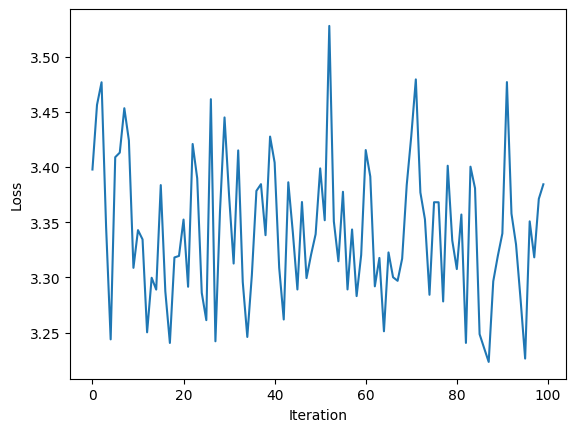

In [86]:

vqc.fit(X_train, y_train)

In [87]:
y_pred_test = vqc.predict(X_test)
y_pred_train = vqc.predict(X_train)
classification_test = classification_report(y_test, y_pred_test)
cm_test = confusion_matrix(y_test, y_pred_test)
classification_train = classification_report(y_train, y_pred_train)
cm_train = confusion_matrix(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)


/home/musa/anaconda3/envs/QIP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/musa/anaconda3/envs/QIP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/musa/anaconda3/envs/QIP/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(r

In [88]:
print(f'Classification test: \n{classification_test}')
print(f'Confusion matrix test: \n{cm_test}')
print(f'Accuracy test: {accuracy_test}')
print(f'Classification train: \n{classification_train}')
print(f'Confusion matrix train: \n{cm_train}')
print(f'Accuracy train: {accuracy_train}')


Classification test: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       100
           1       0.00      0.00      0.00       100
           2       0.00      0.00      0.00       100
           3       0.17      0.78      0.28       100
           4       0.50      0.04      0.07       100
           5       0.02      0.02      0.02       100
           6       0.51      0.22      0.31       100
           7       0.00      0.00      0.00       100
           8       0.06      0.23      0.09       100
           9       0.00      0.00      0.00       100

    accuracy                           0.13      1000
   macro avg       0.13      0.13      0.08      1000
weighted avg       0.13      0.13      0.08      1000

Confusion matrix test: 
[[ 0  0  0 17  3 14  0  0 59  7]
 [ 0  0  0 36  0  0  0  0 64  0]
 [ 0  0  0 68  0 17  3  0 12  0]
 [ 0  0  0 78  0  3  0  0 19  0]
 [ 0  0  0 27  4  8 11  0 50  0]
 [ 0  0  0 35  0  2  0  0 63  

In [49]:
# save results to file 
import time
#calculate time now
now = time.strftime("%c")

file = open("multiresults.txt", "a")
file.write(f'-----------Expirement conducted on-------- {now}\n')
file.write(f'VQC with {encoding} encoding and {size}x{size} images\n')
file.write(f'number of (train, test) examples = {num_train, num_test}\n')
file.write(f'optimizer = {optimizer}\n')
file.write(f'number of iterations = {maxiterations}\n')
file.write(f'--------------Test results----------------\n')
file.write(f'Classification test: \n{classification_test}\n')
file.write(f'Confusion matrix test: \n{cm_test}\n')
file.write(f'Accuracy test: {accuracy_test}\n')
file.write(f'--------------Train results----------------\n')
file.write(f'Classification train: \n{classification_train}\n')
file.write(f'Confusion matrix train: \n{cm_train}\n')
file.write(f'Accuracy train: {accuracy_train}\n')
file.close()


In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(32 * 4 * 4, 64)
        self.fc2 = nn.Linear(64, 2)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.pool(x)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = x.view(-1, 32 * 4 * 4)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Load the MNIST dataset
train_data = trainset# datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
test_data = testset#datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())

# Filter the dataset to include only the desired classes (e.g., 0 and 1)
train_data.data = train_data.data[(train_data.targets == 0) | (train_data.targets == 1)]
train_data.targets = train_data.targets[(train_data.targets == 0) | (train_data.targets == 1)]
test_data.data = test_data.data[(test_data.targets == 0) | (test_data.targets == 1)]
test_data.targets = test_data.targets[(test_data.targets == 0) | (test_data.targets == 1)]

# Create data loaders
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

# Initialize the model, loss function, and optimizer
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(10):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f'Epoch {epoch+1} loss: {running_loss / len(train_loader)}')

# Evaluate the model on the test set
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Test accuracy: {100 * correct / total}%')

ValueError: Expected input batch_size (4) to match target batch_size (64).